<a href="https://colab.research.google.com/github/BobChrismansyah/Data-Mining/blob/main/Tugas-Pertemuan6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Nama : Bob Chrismansyah Pata'dungan Kabanga

### NIM : H071201087

# Data Citra

Menghubungkan google collab dengan drive agar bisa mengimpor file dari drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


disini kita menggunkan library open cv2 atau computer vision
Gambar berupa float jadi kita menggunakan library matplotlib

keras.preprocessing.image digunakan unutk menampilkan array dan untuk augmentasi data citra

library PIL digunakan untuk memanipulasi file gambar. Kode dibawah digunakan untuk mengimport library-library tadi.

matplotlib untuk menampilkan plot

In [ ]:
import cv2
from matplotlib import pyplot as plt
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from skimage import io
from tensorflow.keras.applications.resnet_v2 import preprocess_input as preprocess_resnetv2
import numpy as np
import os
from PIL import Image

1. Import Gambar untuk menampilkan

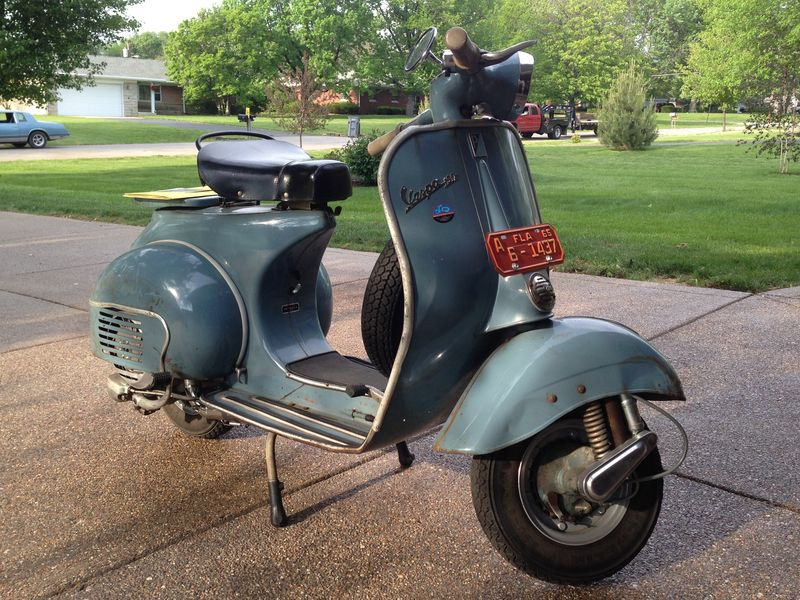

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img=cv2.imread('/content/drive/MyDrive/Kuliah/Semester3/DataMining/vespa_vbb.jpg', cv2.IMREAD_UNCHANGED)

cv2_imshow(img)

ketika kita mengimport langsung gambarnya maka format gambarnya itu BGR bukan RGB

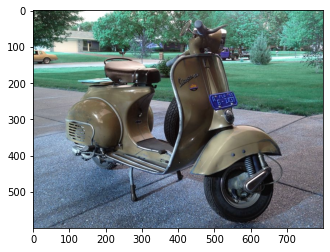

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Kuliah/Semester3/DataMining/vespa_vbb.jpg')
plt.imshow(image)

Untuk merubah format gambar dari BGR menjadi RGB, kita bisa menggunakan cv2.COLOR_(format)

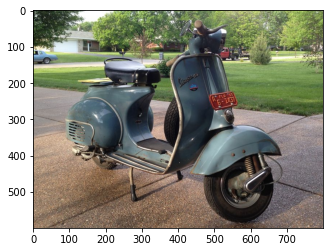

In [ ]:
image_cvtresult = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_cvtresult)

Untuk menampilkan gambar dalam bentuk grayscale, kita bisa menambahkan 0 pada akhir link

Menampilkan setiap channel dari gambar,
di gambar berikut kita menampilkan 3 cahnnel

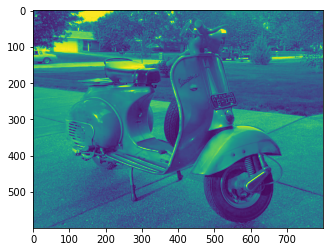

In [ ]:
r,g,b = cv2.split(image_cvtresult)
plt.imshow(b)

Citra merupakan kumpulan angka-angka yang merupakan intensitas kecerahan dari citra tersebut

Oleh karena itu bisa diubah menjadi array agar lebih mudah diproses, caranya yaitu bisa menggunakan from keras.preprocessing.image import img_to_array


In [ ]:
image_array = img_to_array(image_cvtresult)
print(image_array)

[[[ 42.  54.  44.]
  [ 10.  22.  12.]
  [ 20.  32.  22.]
  ...
  [139. 155. 108.]
  [ 71.  87.  38.]
  [ 94. 110.  61.]]

 [[  6.  18.   8.]
  [ 36.  48.  38.]
  [ 24.  36.  26.]
  ...
  [166. 182. 133.]
  [ 92. 108.  59.]
  [ 85. 101.  52.]]

 [[ 31.  43.  31.]
  [ 26.  38.  26.]
  [ 16.  28.  16.]
  ...
  [131. 147.  98.]
  [136. 152. 103.]
  [103. 120.  68.]]

 ...

 [[181. 157. 133.]
  [142. 118.  94.]
  [125.  99.  76.]
  ...
  [153. 134. 128.]
  [146. 127. 120.]
  [145. 126. 119.]]

 [[170. 146. 122.]
  [171. 147. 123.]
  [172. 146. 123.]
  ...
  [121. 102.  96.]
  [129. 110. 103.]
  [148. 129. 122.]]

 [[181. 157. 133.]
  [166. 142. 118.]
  [145. 119.  96.]
  ...
  [135. 116. 110.]
  [150. 131. 124.]
  [198. 179. 172.]]]


Ada bebebrapa model warna yang berbeda beda 
- grayscale 1 dimensi
- HSV 3 dimensi
- RGB 3 dimensi
- BGR 3 dimensi
- CMYK 4 dimensi

Dimensi di sini maksudnya adalah jika ketiga warna dasar itu dicampur akan menghasilkan warna-warna yang diinginkan

Kemudian berikut unutk menampilkan dan membandingkan empat model warna yaitu BGR, RGB, GRAYSCALE dan HSV

<function matplotlib.pyplot.show>

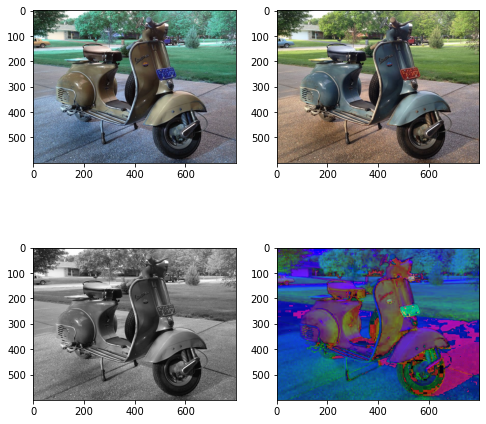

In [ ]:

fig = plt.figure(num = None, figsize=(8, 8))

image_grayscale_temp = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_grayscale = cv2.cvtColor(image_grayscale_temp, cv2. COLOR_GRAY2RGB)

image_hsv = cv2.cvtColor(image_cvtresult, cv2.COLOR_RGB2HSV)

ax = fig.add_subplot(2, 2, 1)
plt.imshow(image)

ax = fig.add_subplot(2, 2, 2)
plt.imshow(image_cvtresult)

ax = fig.add_subplot(2, 2, 3)
plt.imshow(image_grayscale)

ax = fig.add_subplot(2, 2, 4)
plt.imshow(image_hsv)

plt.show

Untuk melihat dan membandingkan tabel histogram dari keempat gambar sebelumnya, plot ini berisi pembagian intensitas warnanya

<function matplotlib.pyplot.show>

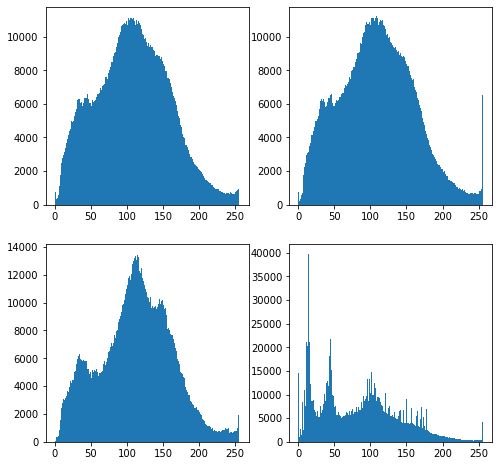

In [ ]:
fig = plt.figure(num = None, figsize=(8, 8))

image_grayscale_temp = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_grayscale = cv2.cvtColor(image_grayscale_temp, cv2. COLOR_GRAY2RGB)

image_hsv = cv2.cvtColor(image_cvtresult, cv2.COLOR_RGB2HSV)

ax = fig.add_subplot(2, 2, 1)
plt.hist(image.ravel(),256,[0,256])

ax = fig.add_subplot(2, 2, 2)
plt.hist(image_cvtresult.ravel(),256,[0,256])

ax = fig.add_subplot(2, 2, 3)
plt.hist(image_grayscale.ravel(),256,[0,256])

ax = fig.add_subplot(2, 2, 4)
plt.hist(image_hsv.ravel(),256,[0,256])

plt.show

Untuk merubah ukuran gambar kita bisa menggunakan image_resize

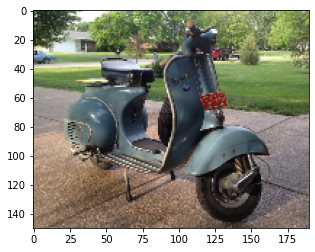

In [ ]:
image_resize = cv2.resize(image_cvtresult, (190, 150))
plt.imshow(image_resize)

Untuk Denoise gambar

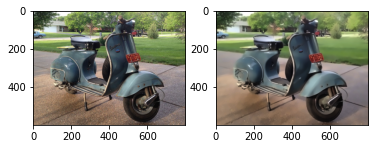

In [ ]:
image1 = cv2.GaussianBlur(image_cvtresult, (3,3), 0)
rgb_dst = cv2.fastNlMeansDenoisingColored(image1, None, 10, 10, 7, 21)

plt.subplot(121),plt.imshow(image_cvtresult)
plt.subplot(122),plt.imshow(rgb_dst)

plt.show()